<a href="https://colab.research.google.com/github/shubhambagalsrb/Data-Science/blob/main/Monte_carlo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt

Data Collection and preprocessing

In [38]:
demand_data = [10, 15, 12, 18, 20, 14, 16, 10, 13, 17, 11, 19] # monthly demand data

Defining Inventory Parameters

In [39]:
service_level = 0.95 # percentage of orders we want to fulfil
lead_time = 2 # time taken for getting ship from vendor to us(retailer)
holding_cost = 0.1 # cost per unit per month
ordering_cost = 50 #cost per order

Implement monte carlo simulation in python

In [40]:
np.mean(np.random.choice(demand_data, size = lead_time))

16.0

In [41]:
num_iterations = 1000
inventory_levels = []

for _ in range(num_iterations):
    demand_scenarios = np.random.choice(demand_data, size = lead_time)
    demand_forecast  = np.mean(demand_scenarios)
    # as demand_forecast sugest demand of a day and lead time is how much time it takes to deliver shipment so inventory position should be
    # demand * lead time
    inventory_position = demand_forecast * lead_time
    inventory_levels.append(inventory_position)

Analyzing the Simulation Results

In [42]:
mean_inventory = np.mean(inventory_levels)
std_inventory = np.std(inventory_levels)

Sensitivity Analysis and decision making (Dummy values)

In [43]:
np.sqrt(lead_time * np.var(demand_data))

4.706673748814312

In [64]:
from scipy.stats import norm
# Z is the standard score corresponding to the desired service level.
z_score = norm.ppf(service_level)  # Correct Z-score calculation
safety_stock = z_score * np.sqrt(lead_time * np.var(demand_data))
reorder_point = lead_time * demand_forecast + safety_stock


In [65]:
z_score

1.2815515655446004

In [66]:
print("Simulation results : ")
print(f"Mean Inventory Level: {mean_inventory:.2f}")
print(f"Standard Deviation of Inventory Level: {std_inventory:.2f}")
print(f"Reorder Point: {reorder_point:.2f}")
print(f"Safety Stock: {safety_stock:.2f}")

Simulation results : 
Mean Inventory Level: 29.24
Standard Deviation of Inventory Level: 4.75
Reorder Point: 35.03
Safety Stock: 6.03


In [67]:
# this is incorrect
# Z is the standard score corresponding to the desired service level.
z_score = np.abs(np.percentile(inventory_levels, (service_level)*100))
reorder_point = lead_time * demand_forecast + z_score * np.sqrt(lead_time * np.var(demand_data))
safety_stock = z_score * np.sqrt(lead_time * np.var(demand_data))

In [68]:
z_score

36.0

Results

In [62]:
print("Simulation results : ")
print(f"Mean Inventory Level: {mean_inventory:.2f}")
print(f"Standard Deviation of Inventory Level: {std_inventory:.2f}")
print(f"Reorder Point: {reorder_point:.2f}")
print(f"Safety Stock: {safety_stock:.2f}")

Simulation results : 
Mean Inventory Level: 29.24
Standard Deviation of Inventory Level: 4.75
Reorder Point: 198.44
Safety Stock: 169.44


plotting the inventory distribution

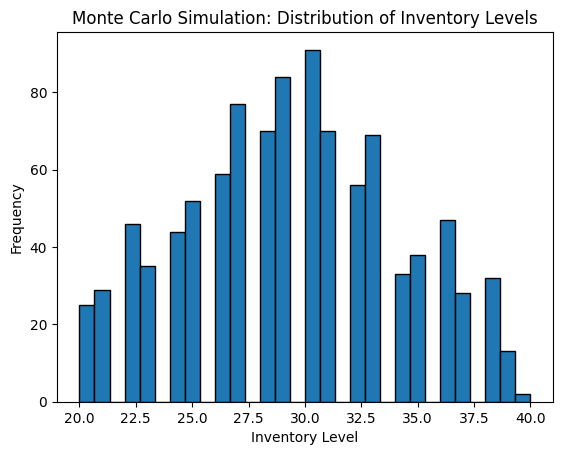

In [69]:
plt.hist(inventory_levels, bins = 30, edgecolor = 'black')
plt.xlabel('Inventory Level')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation: Distribution of Inventory Levels')
plt.show()

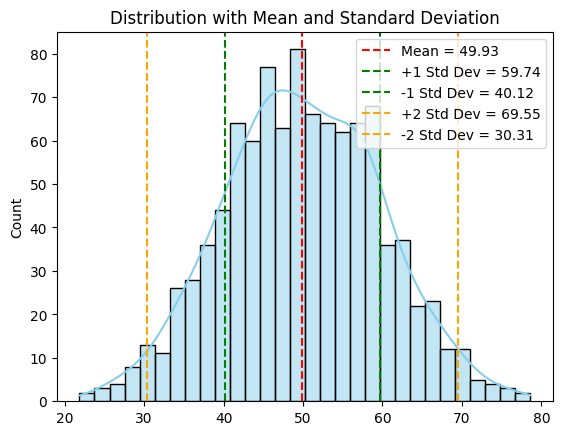

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = np.random.normal(loc=50, scale=10, size=1000)  # Mean=50, Std=10

# Plot distribution
sns.histplot(data, bins=30, kde=True, color='skyblue')

# Mean and Standard Deviation
mean = np.mean(data)
std_dev = np.std(data)

# Plot mean and standard deviation lines
plt.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
plt.axvline(mean + std_dev, color='green', linestyle='--', label=f'+1 Std Dev = {mean + std_dev:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='--', label=f'-1 Std Dev = {mean - std_dev:.2f}')
plt.axvline(mean + 2 * std_dev, color='orange', linestyle='--', label=f'+2 Std Dev = {mean + 2 * std_dev:.2f}')
plt.axvline(mean - 2 * std_dev, color='orange', linestyle='--', label=f'-2 Std Dev = {mean - 2 * std_dev:.2f}')

plt.title('Distribution with Mean and Standard Deviation')
plt.legend()
plt.show()


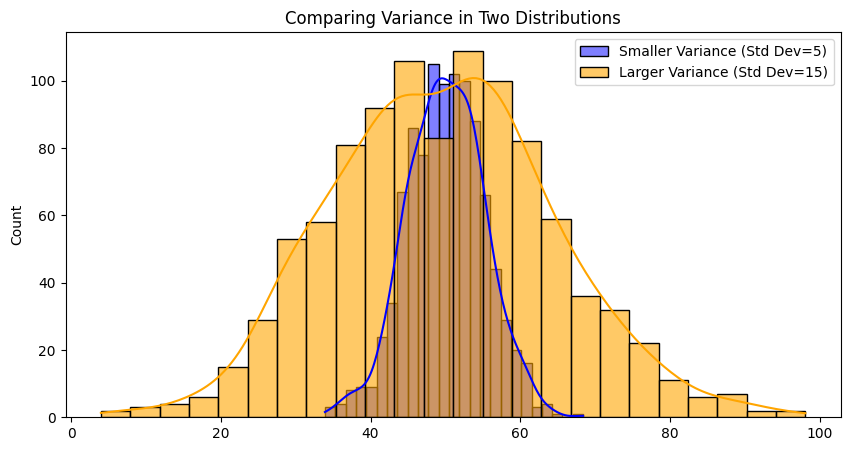

In [2]:
data1 = np.random.normal(50, 5, 1000)  # Smaller variance
data2 = np.random.normal(50, 15, 1000)  # Larger variance

plt.figure(figsize=(10, 5))
sns.histplot(data1, color='blue', kde=True, label='Smaller Variance (Std Dev=5)')
sns.histplot(data2, color='orange', kde=True, label='Larger Variance (Std Dev=15)', alpha=0.6)
plt.title('Comparing Variance in Two Distributions')
plt.legend()
plt.show()


In [36]:
std_inventory/0.05

94.11864639910627